<a href="https://colab.research.google.com/github/OjasZ/EDA/blob/main/21BDS0187_Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PHASE 2 OPERATIONS
Load the dataset and build a model to evaluate for the given dataset using python.
* Data Cleaning
* Data Handling
* 1D, 2D and N-D Visualization
* Time-series Analyis (if Date or Time stap in the dataset has given)
* Analysis of 1D, 2D and N-D data
* Dimensionality reduction
* Model building and
* Evaluation of model


# 1. Essential Library Imports
Imports core data manipulation (pandas/numpy) and visualization libraries (matplotlib/seaborn) for exploratory analysis and preprocessing.



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# 2. Data Preprocessing Tools
Includes key preprocessing components:
* LabelEncoder: Converts categorical text to numerical values
* StandardScaler: Normalizes features to zero mean/unit variance
* SimpleImputer: Handles missing values through imputation strategies


In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer


# 3. Dimensionality Reduction
Principal Component Analysis for feature reduction and data compression while preserving variance.


In [8]:
from sklearn.decomposition import PCA


# 4. Model Development Framework
Contains:
* train_test_split: Dataset splitting for validation
* LogisticRegression: Binary/multi-class classification implementation

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# 5. Model Evaluation Metrics
Provides:
* accuracy_score: Basic performance metric
* classification_report: Precision/recall/F1 scores
* confusion_matrix: Error type visualization

In [4]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 6. Data Loading
Implements a secure file loading mechanism that:
* Attempts CSV Loading: Uses pandas' read_csv() for data ingestion
* Handles File Errors: Specifically catches FileNotFoundError for missing files
* Manages General Exceptions: Captures unexpected errors with detailed messaging
* Ensures Graceful Exit: Prevents further execution on critical loading failures

In [10]:
# 1. Data Loading
try:
    df = pd.read_csv("SuicideChina.csv")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: SuicideChina.csv not found.  Make sure the file is in the correct directory.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")
    exit()

Dataset loaded successfully!


#7. Data Cleaning and Preparation
Implements a comprehensive data sanitization pipeline that:
* Audits Data Integrity through info(), describe(), and isnull().sum() to reveal structure, statistics, and missing values
* Converts Temporal Features (Year/Month) to numeric format with error handling for invalid entries
* Removes Redundancies by eliminating duplicates and non-informative columns (rownames/Person_ID)
* Encodes Binary Variables (Hospitalised/Died/Urban) into 1/0/-1 values for machine learning compatibility
* Maintains Error Resilience through errors='ignore' and fillna() operations to prevent pipeline failures

Key Features:
* Type Safety: Ensures numeric formats for modeling
* Semantic Preservation: Maintains data meaning through careful value mapping
* Production Readiness: Implements defensive programming practices
* Auditability: Prints diagnostic information for quality checks

In [11]:
# 2. Data Cleaning and Handling
# Display initial info and descriptive statistics
print("\nInitial Data Info:\n")
print(df.info())

print("\nDescriptive Statistics:\n")
print(df.describe())

# Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())

# Convert relevant columns to appropriate types (if needed)
# Example: Convert 'Year' and 'Month' to numeric if they aren't already
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').fillna(0).astype(int)
df['Month'] = pd.to_numeric(df['Month'], errors='coerce').fillna(0).astype(int)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Remove the rownames column
df.drop(columns=['rownames'], inplace=True, errors='ignore')

# Drop Person_ID as it's just an identifier
df.drop(columns=['Person_ID'], inplace=True, errors='ignore')

# Convert binary columns to numeric (0 and 1)
binary_cols = ['Hospitalised', 'Died', 'Urban']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0}).fillna(-1).astype(int)  # Handle potential NaNs during mapping



Initial Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rownames      2571 non-null   int64 
 1   Person_ID     2571 non-null   int64 
 2   Hospitalised  2571 non-null   object
 3   Died          2571 non-null   object
 4   Urban         2571 non-null   object
 5   Year          2571 non-null   int64 
 6   Month         2571 non-null   int64 
 7   Sex           2571 non-null   object
 8   Age           2571 non-null   int64 
 9   Education     2571 non-null   object
 10  Occupation    2571 non-null   object
 11  method        2571 non-null   object
dtypes: int64(5), object(7)
memory usage: 241.2+ KB
None

Descriptive Statistics:

          rownames    Person_ID         Year        Month          Age
count  2571.000000  2571.000000  2571.000000  2571.000000  2571.000000
mean   1286.000000  1286.000000  2010.045508     6.298327  

## 8. Data Transformation
Converts categorical features into machine-readable format through systematic encoding:
* Automated Detection: Identifies text-based columns dynamically
* Consistent Encoding: Maintains label-index relationships across features
* Transformation Tracking: Stores encoders for potential inverse operations

In [12]:

# 3. Data Transformation
# Label Encoding for categorical features
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

print("\nData after Label Encoding:\n")
print(df.head())





Data after Label Encoding:

   Hospitalised  Died  Urban  Year  Month  Sex  Age  Education  Occupation  \
0             1     0      0  2010     12    0   39          0           2   
1             0     1      0  2009      3    1   83          3           1   
2             0     1      0  2010      2    1   60          3           1   
3             0     1      0  2011      1    1   73          3           1   
4             1     0      0  2009      8    1   51          0           1   

   method  
0       4  
1       2  
2       2  
3       2  
4       6  


# 9. Data Visualization


#4.1 Feature Distribution Analysis
Generates comprehensive 1D visualizations to reveal data patterns:

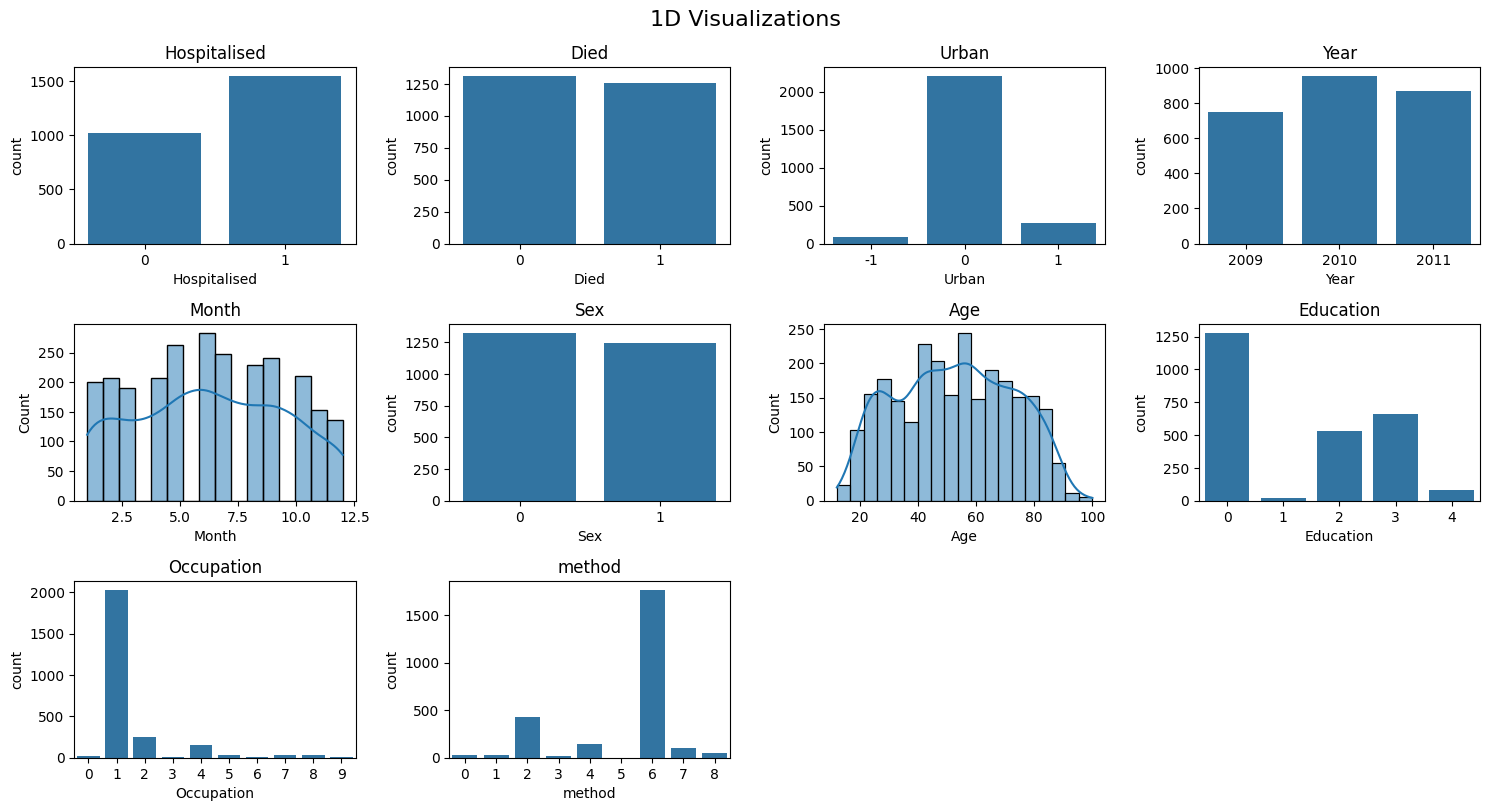

In [13]:
# 4. Data Visualization

# 4.1 1D Visualization (Histograms and Count Plots)
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)
    if df[col].nunique() > 10:
        sns.histplot(df[col], kde=True)
    else:
        sns.countplot(data=df, x=col)
    plt.title(col)
plt.tight_layout()
plt.suptitle('1D Visualizations', y=1.02, fontsize=16)
plt.show()

# 4.2 2D Relationship Analysis
Examines feature interactions through scatter plots and pairwise comparisons
* Target-Conditioned Plotting: Uses 'Died' as hue to reveal class patterns
* Feature Interaction Analysis: Examines pairwise relationships between key attributes
* Dimensional Insight: Combines multiple features in single visualization

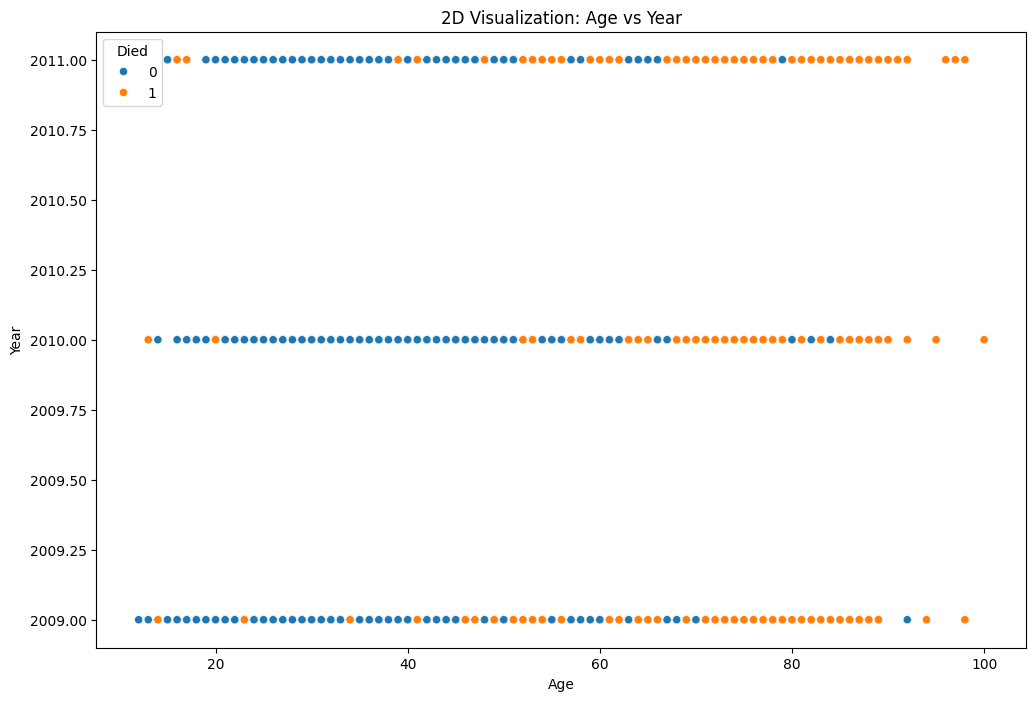

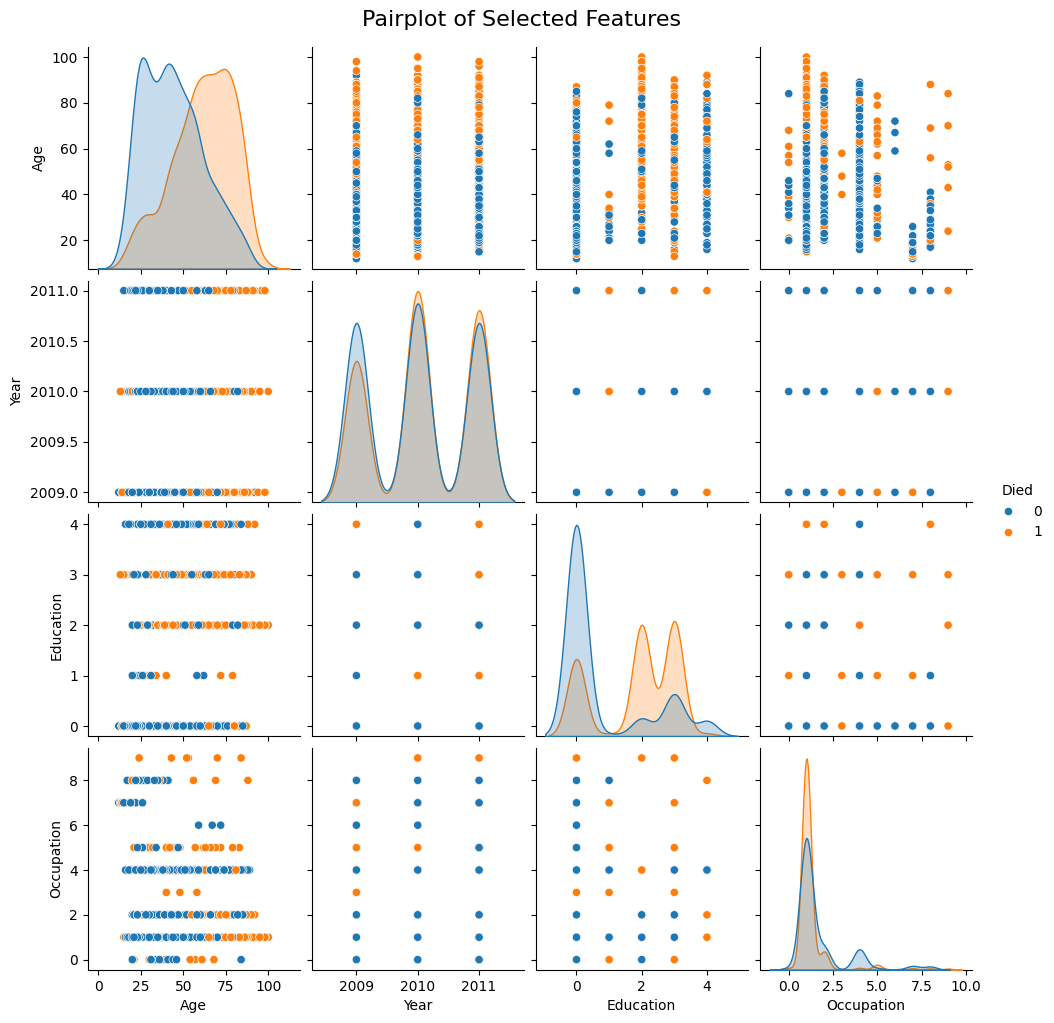

In [14]:

# 4.2 2D Visualization (Scatter plots and Pair plots)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Age', y='Year', hue='Died')
plt.title('2D Visualization: Age vs Year')
plt.show()

# Pairplot for a subset of features
sns.pairplot(df[['Age', 'Year', 'Education', 'Occupation', 'Died']], hue='Died')
plt.suptitle('Pairplot of Selected Features', y=1.02, fontsize=16)
plt.show()


# 4.3 Multivariate Correlation Analysis
Reveals complex feature relationships through matrix visualization
* Full-Feature Analysis: Computes Pearson correlations for all numeric columns
* Annotated Visualization: Displays exact correlation coefficients
* Color Encoding: Uses coolwarm palette for intuitive coefficient interpretation

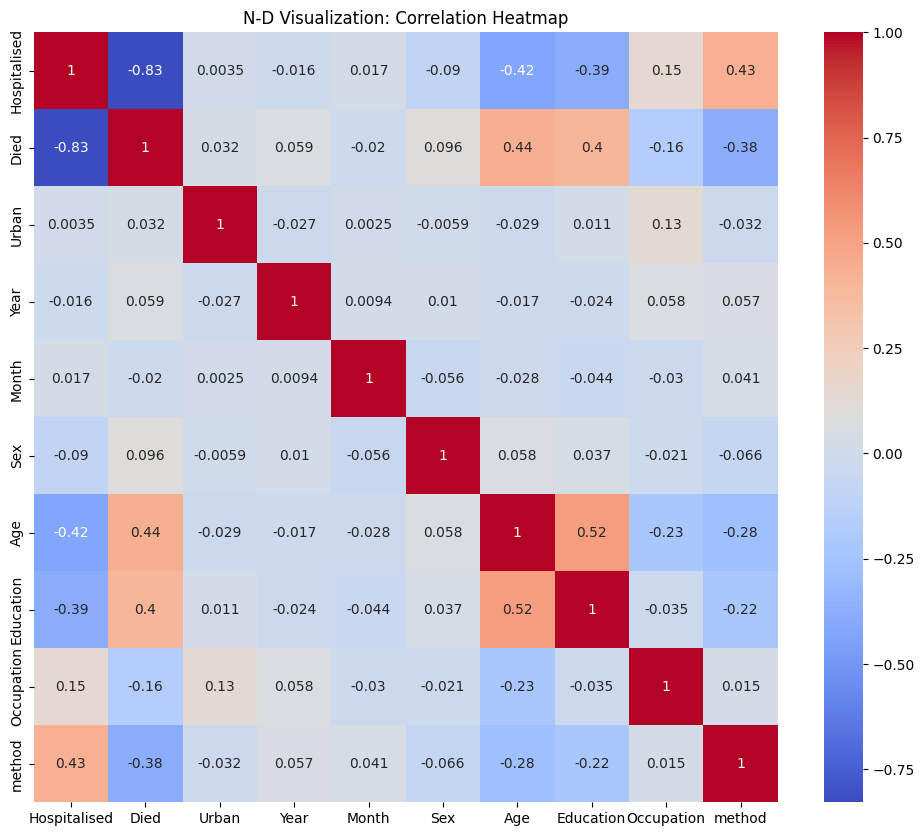

In [15]:
# 4.3 N-D Visualization (Correlation Heatmap)
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('N-D Visualization: Correlation Heatmap')
plt.show()

#10. Time Series Analysis
Analyzes temporal patterns in suicide-related deaths through date-based aggregation and visualization
* Temporal Reconstruction: Creates proper datetime objects from Year/Month columns
* Death Frequency Analysis: Aggregates suicide counts by monthly intervals
* Trend Identification: Reveals seasonal patterns and long-term trajectories
* Visual Clarity: Uses clean line plot for temporal pattern recognition

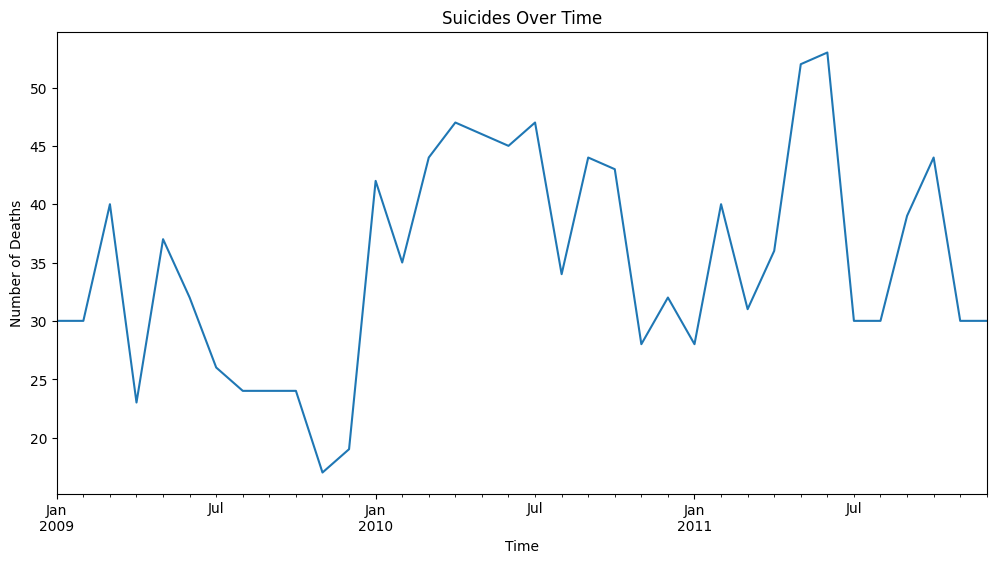

In [ ]:


# 5. Time Series Analysis (If Applicable)
# Since the dataset contains 'Year' and 'Month', we can perform some basic time series analysis.

# Create a date column
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str), format='%Y-%m')

# Group by date and count the number of deaths
time_series = df.groupby('Date')['Died'].sum()

# Plot the time series
plt.figure(figsize=(12, 6))
time_series.plot(title='Suicides Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Deaths')
plt.show()


# 11. Multi-Dimensional Data Analysis
Implements a comprehensive analytical framework combining statistical summaries and relationship analysis across different dimensions

#6.1 Univariate Analysis
Examines feature distributions and categorical value frequencies

In [16]:

# 6. Analysis of 1D, 2D, and N-D Data
# 6.1 1D Analysis (Value Counts and Distributions)
print("\nValue Counts for Categorical Variables:\n")
for col in categorical_cols:
    print(f"\n{col}:\n{df[col].value_counts()}")

print("\nDistribution of Age:\n")
print(df['Age'].describe())


Value Counts for Categorical Variables:


Sex:
Sex
0    1328
1    1243
Name: count, dtype: int64

Education:
Education
0    1280
3     659
2     533
4      80
1      19
Name: count, dtype: int64

Occupation:
Occupation
1    2032
2     248
4     156
5      37
7      35
8      30
0      21
9       6
3       3
6       3
Name: count, dtype: int64

method:
method
6    1768
2     431
4     146
7     107
8      48
0      29
1      26
3      15
5       1
Name: count, dtype: int64

Distribution of Age:

count    2571.000000
mean       52.630883
std        19.783878
min        12.000000
25%        37.000000
50%        53.000000
75%        69.000000
max       100.000000
Name: Age, dtype: float64


6.2 Bivariate Relationship Analysis
Investigates relationships between target variable ('Died') and categorical features
* Gender Mortality Patterns: Reveals sex-based differences in suicide outcomes
* Association Strength: Quantifies relationship between categorical variables
* Data Validation: Verifies label encoding consistency

In [17]:
# 6.2 2D Analysis (Cross-tabulations)
print("\nCross-tabulation of Died vs. Sex:\n")
print(pd.crosstab(df['Died'], df['Sex']))



Cross-tabulation of Died vs. Sex:

Sex     0    1
Died          
0     741  574
1     587  669


# 6.3 Multivariate Correlation Analysis
Extracts insights from full-feature correlation matrix
* Feature Relationships: Identifies strongly correlated variables
* Target Correlates: Highlights features most associated with 'Died' outcome
* Multicollinearity Check: Detects redundant features for model development

In [18]:
# 6.3 N-D Analysis (Correlation Insights)
print("\nCorrelation Matrix:\n")
print(correlation_matrix)


Correlation Matrix:

              Hospitalised      Died     Urban      Year     Month       Sex  \
Hospitalised      1.000000 -0.828431  0.003499 -0.015754  0.016815 -0.090442   
Died             -0.828431  1.000000  0.032482  0.058848 -0.019854  0.096169   
Urban             0.003499  0.032482  1.000000 -0.026806  0.002503 -0.005881   
Year             -0.015754  0.058848 -0.026806  1.000000  0.009380  0.010264   
Month             0.016815 -0.019854  0.002503  0.009380  1.000000 -0.055623   
Sex              -0.090442  0.096169 -0.005881  0.010264 -0.055623  1.000000   
Age              -0.423341  0.440377 -0.028781 -0.017267 -0.028397  0.057521   
Education        -0.387122  0.400658  0.010917 -0.024147 -0.043844  0.037108   
Occupation        0.148457 -0.160263  0.130824  0.057845 -0.030069 -0.021119   
method            0.433872 -0.381914 -0.032486  0.056605  0.040987 -0.065848   

                   Age  Education  Occupation    method  
Hospitalised -0.423341  -0.387122    0.

# 12. Dimensionality Reduction with PCA
Implements a feature reduction pipeline to handle high-dimensional data
1. Feature Isolation:
Excludes target (Died) and temporal (Date) variables
Preserves boolean/numeric features through column selection
2. Data Sanitization:
* Imputation: Fills missing values using column means
* Scaling: Normalizes features to zero mean and unit variance
* Dimensionality Reduction:
* PCA Configuration: Retains 8 principal components (adjustable)
* Variance Analysis: Outputs explained variance per component
* Feature Compression: Reduces feature space while preserving information





In [ ]:

# 7. Dimensionality Reduction (PCA)
# Separate features (X) and target (y)
X = df.drop(['Died', 'Date'], axis=1)  # Features, excluding 'Died' and 'Date'
y = df['Died']  # Target variable

# Identify numerical and boolean columns for scaling
numerical_cols = X.select_dtypes(include=['number', 'bool']).columns

# Imputation
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', 'constant'
X[numerical_cols] = imputer.fit_transform(X[numerical_cols])

# Scaling the numerical data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[numerical_cols])

# Convert scaled data back to DataFrame
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=numerical_cols)

# Apply PCA
pca = PCA(n_components=8)  # Adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

print("\nExplained Variance Ratio by each component:\n", pca.explained_variance_ratio_)



Explained Variance Ratio by each component:
 [0.24509467 0.12803258 0.11604717 0.11314115 0.10581313 0.09614864
 0.09100262 0.05667575]


# 13. Model Development & Evaluation
Implements a complete machine learning workflow for suicide outcome prediction

1. Data Partitioning:
* 70-30 Split: Maintains sufficient training data while ensuring robust testing
* Random Seed: Ensures reproducible results (random_state=42)
2. Model Selection:
* Algorithm Choice: Logistic Regression for binary classification
* PCA Integration: Uses 8 principal components from previous step
3. Evaluation Metrics:
* Accuracy: Overall prediction correctness
* Precision/Recall: Class-specific performance metrics
* Confusion Matrix: Detailed error type breakdown


In [ ]:

# 8. Model Building and Evaluation
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Evaluation:

Accuracy: 0.8847150259067358

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       400
           1       0.98      0.78      0.87       372

    accuracy                           0.88       772
   macro avg       0.90      0.88      0.88       772
weighted avg       0.90      0.88      0.88       772


Confusion Matrix:
 [[394   6]
 [ 83 289]]
